In [1]:
import os
import numpy

In [2]:
ws_folder = r'D:\PhD_Workspace\MISR_AHI_WS\240111'
MXD_RAA_infos_npy = os.path.join(ws_folder, 'statistic', 'MXD03_RAA-matched_infos_10km_land.npy')
MXD_RAY_infos_npy = os.path.join(ws_folder, 'statistic', 'MXD03_RAY-matched_infos_10km_land.npy')

In [3]:
RAA_matched_infos = numpy.load(MXD_RAA_infos_npy)
RAY_matched_infos = numpy.load(MXD_RAY_infos_npy)

In [4]:
def latitudes_info_count(matched_info):
    all_record = numpy.zeros((12,))
    for pt_item in matched_info:
        pt_lat = float(pt_item[1])
        if pt_lat <= 60 and pt_lat > 50:    # 60N-50N
            all_record[0] = all_record[0] + 1
        elif pt_lat <= 50 and pt_lat > 40:  # 50N-40N
            all_record[1] = all_record[1] + 1
        elif pt_lat <= 40 and pt_lat > 30:  # 40N-30N
            all_record[2] = all_record[2] + 1
        elif pt_lat <= 30 and pt_lat > 20:  # 30N-20N
            all_record[3] = all_record[3] + 1
        elif pt_lat <= 20 and pt_lat > 10:  # 20N-10N
            all_record[4] = all_record[4] + 1
        elif pt_lat <= 10 and pt_lat > 0:  # 10N-0
            all_record[5] = all_record[5] + 1
        elif pt_lat <= 0 and pt_lat > -10:    # 0-10S
            all_record[6] = all_record[6] + 1
        elif pt_lat <= -10 and pt_lat > -20:    # 10S-20S
            all_record[7] = all_record[7] + 1
        elif pt_lat <= -20 and pt_lat > -30:  # 20S-30S
            all_record[8] = all_record[8] + 1
        elif pt_lat <= -30 and pt_lat > -40:  # 30S-40S
            all_record[9] = all_record[9] + 1
        elif pt_lat <= -40 and pt_lat > -50:  # 40S-50S
            all_record[10] = all_record[10] + 1
        elif pt_lat <= -50 and pt_lat > -60:  # 50S-60S
            all_record[11] = all_record[11] + 1
    return all_record

In [5]:
RAA_latitudes_info_count = latitudes_info_count(RAA_matched_infos)
RAY_latitudes_info_count = latitudes_info_count(RAY_matched_infos)

### mapping

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [7]:
def mapping_double_bar_angle(ray_bar_data, raa_bar_data):
    plt.figure(figsize=(14,8))
    f, ax1 = plt.subplots()
#     f.set_size_inches(6, 4)
#     f.set_dpi(100)

    bar_width = 0.35
    x_array = numpy.arange(1, 13, 1)
    
    ray_bottom_array = numpy.zeros((12,))
    raa_bottom_array = numpy.zeros((12,))
    ax1.bar(x_array - bar_width/2, ray_bar_data, width=bar_width, color='lightcyan', bottom=ray_bottom_array, edgecolor='black', hatch='//', label='RAA-matched pairs')
    ax1.bar(x_array + bar_width/2, raa_bar_data, width=bar_width, color='lavender', bottom=raa_bottom_array, edgecolor='black', hatch='\\\\', label='RAA-matched pairs')

    # mapping
    ax1.grid(linestyle='--', linewidth=0.6, axis='y')
    ax1.set_xlabel('Latitude Ranges', fontsize=18)
    ax1.minorticks_on()
    x_minor_locator = plt.MultipleLocator(1)
    x_major_locator = plt.MultipleLocator(1)
#     y1_minor_locator = plt.MultipleLocator(20)
#     y1_major_locator = plt.MultipleLocator(100)
    x_labels = ['', '60°N-50°N', '50°N-40°N', '40°N-30°N', '30°N-20°N', '20°N-10°N', '10°N-0°', '0°-10°S', '10°S-20°S', '20°S-30°S', '30°S-40°S', '40°S-50°S', '50°S-60°S']
    ax1.set_xticklabels(x_labels)
    ax1.tick_params(axis='x', rotation=20)
    ax1.xaxis.set_minor_locator(x_minor_locator)
    ax1.xaxis.set_major_locator(x_major_locator)
#     ax1.yaxis.set_major_locator(y1_major_locator)
#     ax1.yaxis.set_minor_locator(y1_minor_locator)
    ax1.tick_params(axis="y", which='minor', length=3, labelsize=10)
    ax1.tick_params(axis="y", which='major', length=5, labelsize=15)
    ax1.ticklabel_format(style='sci', scilimits=(0, 0), axis='y')
    sf1 = ScalarFormatter(useMathText=True)
    sf1.set_powerlimits((0, 0))
    ax1.yaxis.set_major_formatter(sf1)
    ax1.yaxis.get_offset_text().set(size=15)
    ax1.tick_params(axis="x", which='minor', length=3, labelsize=10)
    ax1.tick_params(axis="x", which='major', length=5, labelsize=10)
    ax1.set_yscale('log')  # 设置 y 轴为对数刻度
    ax1.set_ylabel('Count of Matched Pairs (log scale)', fontsize=18)
#     ax1.set_ylim(0, 585)
    ax1.legend(loc=1, fontsize='large', title='Count of Matched Pairs')

In [20]:
def mapping_double_bar_angle(ray_bar_data, raa_bar_data, save_flag=0):
    plt.figure(figsize=(12,8))
#     f, ax1 = plt.subplots()
#     f.set_size_inches(6, 4)
#     f.set_dpi(100)

    bar_width = 0.35
    x_array = numpy.arange(1, 13, 1)
    
    ray_bottom_array = numpy.zeros((12,))
    raa_bottom_array = numpy.zeros((12,))
    plt.bar(x_array - bar_width/2, ray_bar_data, width=bar_width, color='lightcyan', bottom=ray_bottom_array, edgecolor='black', hatch='/', label='Ray-matched pairs')
    plt.bar(x_array + bar_width/2, raa_bar_data, width=bar_width, color='lavender', bottom=raa_bottom_array, edgecolor='black', hatch='\\', label='RAA-matched pairs')

    # mapping
    plt.grid(which='both', linestyle='--', linewidth=0.6, axis='y')
    plt.xlabel('Latitude Ranges', fontsize=15)
    x_minor_locator = plt.MultipleLocator(1)
    x_major_locator = plt.MultipleLocator(1)
    x_labels = ['', '60°N-50°N', '50°N-40°N', '40°N-30°N', '30°N-20°N', '20°N-10°N', '10°N-0°', '0°-10°S', '10°S-20°S', '20°S-30°S', '30°S-40°S', '40°S-50°S', '50°S-60°S']
    plt.xticks(numpy.arange(0, 13, 1), x_labels)
    plt.tick_params(axis='x', rotation=20)
    plt.gca().xaxis.set_major_locator(x_major_locator)
    plt.tick_params(axis="y", which='minor', length=3, labelsize=10)
    plt.tick_params(axis="y", which='major', length=5, labelsize=15)
    plt.ticklabel_format(style='sci', scilimits=(0, 0), axis='y')
    sf1 = ScalarFormatter(useMathText=True)
    sf1.set_powerlimits((0, 0))
    plt.gca().yaxis.set_major_formatter(sf1)
    plt.gca().yaxis.get_offset_text().set(size=15)
    plt.tick_params(axis="x", which='minor', length=3, labelsize=10)
    plt.tick_params(axis="x", which='major', length=5, labelsize=15)
    plt.yscale('log')  # 设置 y 轴为对数刻度
    plt.ylabel('Count of Matched Pairs (log scale)', fontsize=18)
#     plt.legend(loc=1, fontsize='large')
    plt.legend(loc=1, fontsize=14)
    if save_flag:
        plt.savefig(os.path.join(ws_folder, 'display', 'MXD_RAA_RAY-matched_count_land.png'), bbox_inches='tight', dpi=500)

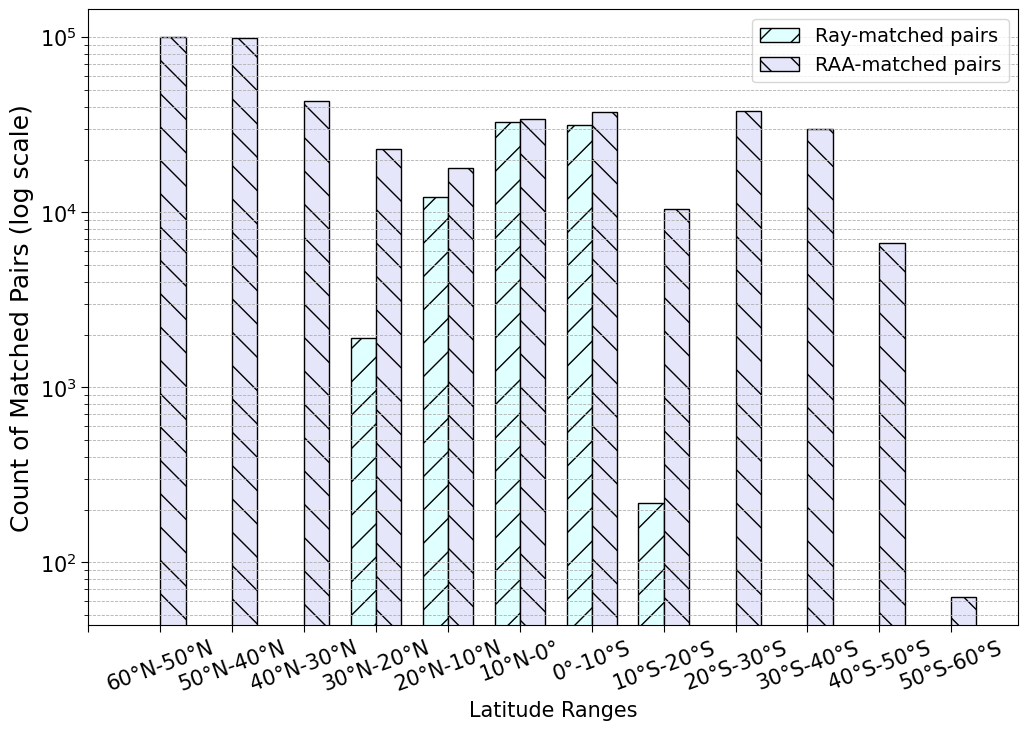

In [21]:
mapping_double_bar_angle(RAY_latitudes_info_count, RAA_latitudes_info_count, 1)